# Class Description: Support Vector Machines (SVM) with Python

## Objective
The goal of this class is to introduce students to Support Vector Machines (SVM) using Python. By the end of this class, students will understand how to apply SVM for classification problems, visualize the results, and interpret the output.


### Class Outline
1. #### Introduction to Support Vector Machines (SVM)
* Overview of SVM and its applications
* Explanation of the SVM concept: separating hyperplane, margin, and support vectors
* Types of SVM kernels: linear and non-linear (RBF)
  
2. #### Data Preparation
* Reading and preprocessing data from multiple CSV files
* Handling timestamps and creating additional time-based features (e.g., month, year)
* Categorizing data into regions
  
3. #### Exploratory Data Analysis (EDA)
* Calculating summary statistics for key variables
* Handling outliers using percentiles
* Aggregating data by month and region

4. #### Implementing SVM in Python
* Preparing data for SVM: feature selection and target variable
* Training an SVM classifier with a linear kernel
* Visualizing the decision boundary and support vectors
  
6. #### Visualization Techniques
* 2D plots for linear SVM with varying regularization parameters (C)
* 3D plots for visualizing multi-dimensional data
* Contour plots for comparing linear and non-linear SVM kernels
  
7. #### Advanced SVM Concepts
* Tuning SVM parameters: regularization parameter (C) and kernel coefficient (gamma)
* Comparing the performance of linear and non-linear kernels
* Visualizing the impact of different SVM parameters on the decision boundary

In [1]:
import os
os.chdir ("/Users/taky/Library/CloudStorage/GoogleDrive-tahmid@udel.edu/Other computers/My Laptop/UDel/Fall 2023/MAST 638_Machine Learning/MAST638_HWs")

----------------------------------------------
       File Loading Report
----------------------------------------------
  total number: 16 file
         ./data/hw05/station-892077.csv
         ./data/hw05/station-892070.csv
         ./data/hw05/station-892071.csv
         ./data/hw05/station-091028.csv
         ./data/hw05/station-091015.csv
         ./data/hw05/station-091017.csv
         ./data/hw05/station-091002.csv
         ./data/hw05/station-091005.csv
         ./data/hw05/station-332064.csv
         ./data/hw05/station-091011.csv
         ./data/hw05/station-332068.csv
         ./data/hw05/station-091008.csv
         ./data/hw05/station-091023.csv
         ./data/hw05/station-091026.csv
         ./data/hw05/station-091030.csv
         ./data/hw05/station-892080.csv
Vector of weights (w) =  [0.22223843 0.13399626]
b =  -6.1957294013049395
Indices of support vectors =  [ 23  24  29  31 106 138  42  47  53  54  55]
Support vectors =  [[18.15       14.76      ]
 [13.7        17.18

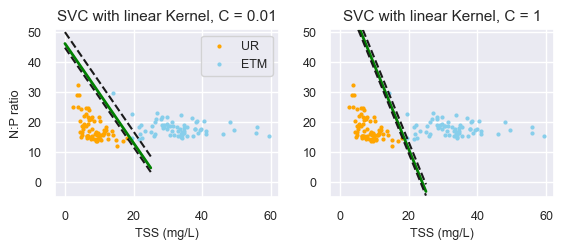

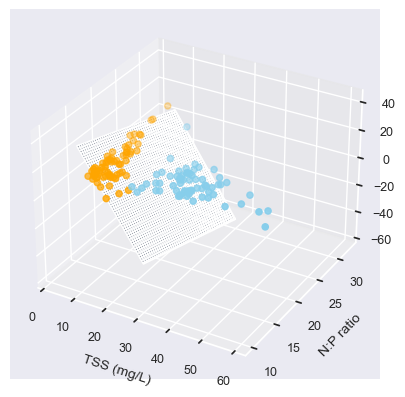

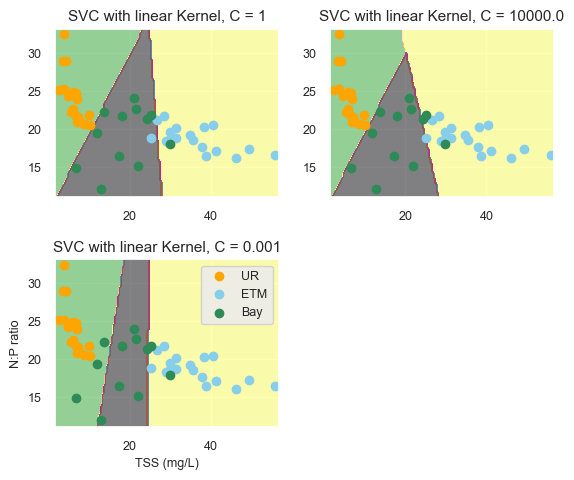

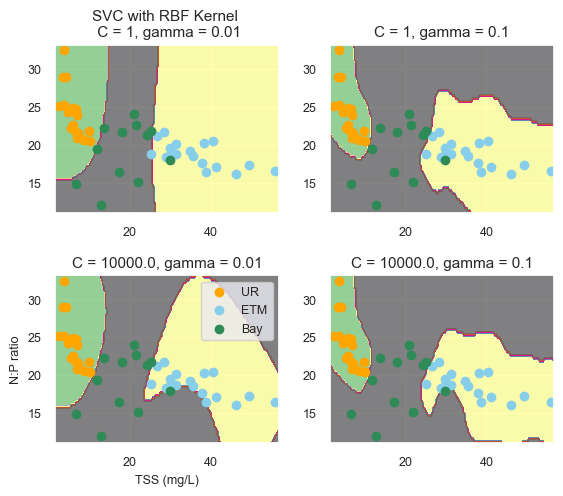

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import glob
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

#####################
##  Global Params  ##
#####################
fdir = './data/hw05/'
list_UR = ['332064','332068','892070','892071','892077','892080']
list_ETM = ['091002','091005','091008','091011','091015','091017']
list_BA = ['091023','091026','091028','091030']
list_all = list_UR + list_ETM + list_BA
vnames = ['chlora_value','tss_value','phosphate_phosphorus_value','nutrient_nitrogen_value']
months = np.arange(1,13,1)
lb = 0.05; ub = 96; msplit = 0.15  # base
colors = np.array(['orange', 'skyblue', 'seagreen'])
descs = np.array(['UR','ETM','Bay'])
fsize = 10

#################
##  load file  ##
#################
fnams = glob.glob(''.join([fdir,'station*.csv']))
print('----------------------------------------------')     
print('       File Loading Report')
print('----------------------------------------------')     
print('  total number:',len(fnams), 'file')
ifile = 0; df = pd.DataFrame()
for fnam in fnams:
  print('        ',fnam)  
  df_tmp = pd.read_csv(fnam)
  df_tmp['timestamp'] = pd.to_datetime(df_tmp['timestamp']).dt.strftime('%Y-%m-%d')
  df_tmp['mday'] = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df_tmp['timestamp']]
  df_tmp['month'] = [dt.datetime.strptime(d,'%Y-%m-%d').month for d in df_tmp['timestamp']]
  df_tmp['year'] = [dt.datetime.strptime(d,'%Y-%m-%d').year for d in df_tmp['timestamp']]   
  if fnam[-10:-4:1] in list_UR:
     df_tmp['region'] = 1; ireg = 1
  if fnam[-10:-4:1] in list_ETM:
     df_tmp['region'] = 2; ireg = 2
  if fnam[-10:-4:1] in list_BA:
     df_tmp['region'] = 3; ireg = 3
  
  mwrk = pd.DataFrame(); mwrk.index = months;
  for vname in vnames:
    dfb = df_tmp.copy(deep=True);
    tmp = dfb[vname]
    dfb.loc[tmp>np.percentile(dfb.loc[tmp.notnull(), vname], ub),vname] = np.nan
    del tmp

    vnum = vname[:-5]+'num'
    mwrk[vnum] = 0
    mwrk[vname] = np.nan  
    for mnow in np.arange(1,13,1):
      tmp = dfb.loc[(dfb.month==mnow) & (dfb[vname].notnull()),vname]      
      mwrk.loc[mnow:mnow,vnum ] = len(tmp)
      mwrk.loc[mnow:mnow,vname] = tmp.mean()      
    del tmp
  mwrk.loc[:,'region'] = ireg      
  df = pd.concat([df,mwrk])  
  ifile = ifile + 1  
del ifile, df_tmp
df['N2P'] = np.divide(df['nutrient_nitrogen_value'], df['phosphate_phosphorus_value'])

mwrk = df.copy(deep=True)
mwrk = mwrk.dropna(axis=0)

############################
## Support Vector Machine ##
############################
tmp = mwrk.copy(deep=True)
tmp = tmp[(tmp.region < 3)]
X = tmp[['tss_value','N2P']].values
r = tmp['region'].values - 1

#---------------------------
# 2D plot with linear SVM
#---------------------------
fig = plt.figure(); iplt = 1;
for C in [0.01,1]:
  clf = svm.SVC(kernel='linear', C=C)
  clf.fit(X, r)
  print('Vector of weights (w) = ', clf.coef_[0])
  print('b = ', clf.intercept_[0])
  print('Indices of support vectors = ', clf.support_)
  print('Support vectors = ', clf.support_vectors_)
  print('Number of support vectors for each class = ', clf.n_support_)
  w = clf.coef_[0]
  slope = -w[0] / w[1]
  b = clf.intercept_[0]
  xx = np.linspace(0,25,num=10)
  yy = slope * xx - (b / w[1])
  s = clf.support_vectors_[0]
  yy_down = slope * xx + (s[1] - slope * s[0])
  s = clf.support_vectors_[-1]
  yy_up = slope * xx + (s[1] - slope * s[0])
  ax = fig.add_axes([fgx+fgdw*(iplt-1),fgy,fgw,fgh])
  ax.tick_params(labelsize=fsize-1)
  for color, i, target in zip(colors, [0, 1], descs[0:2]):
    plt.scatter(X[r==i, 0], X[r==i, 1], color=color, label=target, s=4)  
  plt.plot(xx, yy, linewidth=2, color='green')
  plt.plot(xx, yy_down, 'k--')
  plt.plot(xx, yy_up, 'k--')
  plt.title('SVC with linear Kernel, C = '+str(C), fontsize=fsize+1)    
  plt.ylim(-5,51)
  plt.xlabel('TSS (mg/L)', fontsize=fsize-1)
  if iplt == 1:
    plt.ylabel('N:P ratio', fontsize=fsize-1)  
    plt.legend(loc='best', shadow=False, scatterpoints=1, fontsize=fsize-1)      
  iplt = iplt + 1
plt.savefig('./figures/HW5_fig1_SVC_linearC_2reg', bbox_inches="tight", dpi=300)

#---------------------------
# 3D plot with linear SVM
#---------------------------
X1 = X[:,0]
X2 = X[:,1]
Z = tmp.chlora_value.values
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, X2, Z, color=[colors[i] for i in r], marker='o')
ax.set_xlabel("TSS (mg/L)")
ax.set_ylabel("N:P ratio")
ax.set_zlabel("chlorophyll a (ug/L)")
features = np.stack((X1,X2,Z), axis=1)
clf = svm.SVC(kernel='linear')
clf.fit(features, r)
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x - clf.coef_[0][1] * y) / clf.coef_[0][2]
tmp = np.linspace(10,30,100)
x, y = np.meshgrid(tmp, tmp)
ax.plot_surface(x, y, x3(x, y), alpha=0.5)
ax.tick_params(labelsize=fsize-1)
ax.set_xlabel('TSS (mg/L)', fontsize=fsize)
ax.set_ylabel('N:P ratio', fontsize=fsize)  
ax.set_zlabel('chlorophyll a (ug/L)', fontsize=fsize)  
plt.savefig('./figures/HW5_fig2_SVC_linearC_2reg_3D', bbox_inches="tight", dpi=300)


#############
## Kernels ##
#############
tmp = mwrk.copy(deep=True)
tmp = tmp[(mwrk.index>1) & (mwrk.index<5)]
X1 = tmp.tss_value.values
X2 = tmp.N2P.values
X = np.stack((X1,X2), axis = 1)
y = tmp.region.values-1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   # min and max for the 1st feature
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1   # min and max for the 2nd feature
h = (x_max / x_min)/100   # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))  # make predictions for each of the points in xx,yy
#--------------------------
#  Linear Kernal
#--------------------------
fig = plt.figure(); iplt = 1;
for C in [1,1E4,1E-3]: # SVM regularization parameter
  clf = svm.SVC(kernel='linear', C=C).fit(X, y)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)  
  
  if iplt<3:
    ax = fig.add_axes([fgx+fgdw*(iplt-1),fgy,fgw,fgh])
  else:
    ax = fig.add_axes([fgx+fgdw*(iplt-3),fgy-fgdh,fgw,fgh])
  ax.tick_params(labelsize=fsize-1)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)  # draw the result using a color plot
  for color, i, target in zip(colors, [0, 1, 2], descs):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
  plt.title('SVC with linear Kernel, C = '+str(C),fontsize=fsize+1)
  iplt=iplt+1
plt.legend(loc='best', shadow=False, scatterpoints=1,fontsize=fsize-1)  
plt.xlabel('TSS (mg/L)',fontsize=fsize-1)
plt.ylabel('N:P ratio',fontsize=fsize-1)  
plt.savefig('./figures/HW5_fig3_SVC_linearC_reg', bbox_inches="tight", dpi=300)

#--------------------------
#  Nonlinear Kernal
#--------------------------
fig = plt.figure(); iplt = 1;
for C in [1,1E4]: # SVM regularization parameter
  for gamma in [0.01,0.1]:
    clf = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  
  
    if iplt<3:
      ax = fig.add_axes([fgx+fgdw*(iplt-1),fgy,fgw,fgh])
    else:
      ax = fig.add_axes([fgx+fgdw*(iplt-3),fgy-fgdh,fgw,fgh])
    ax.tick_params(labelsize=fsize-1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)  # draw the result using a color plot
    for color, i, target in zip(colors, [0, 1, 2], descs):
      plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    plt.title('C = '+str(C)+', gamma = '+str(gamma),fontsize=fsize+1)
    
    if iplt==3:
      plt.legend(loc='best', shadow=False, scatterpoints=1,fontsize=fsize-1)  
      plt.xlabel('TSS (mg/L)',fontsize=fsize-1)
      plt.ylabel('N:P ratio',fontsize=fsize-1)  
    elif iplt==1:
      plt.title('SVC with RBF Kernel \n C = '+str(C)+', gamma = '+str(gamma),fontsize=fsize+1)
    iplt=iplt+1
plt.savefig('./figures/HW5_fig4_SVC_nonlinear_3reg', bbox_inches="tight", dpi=300)

